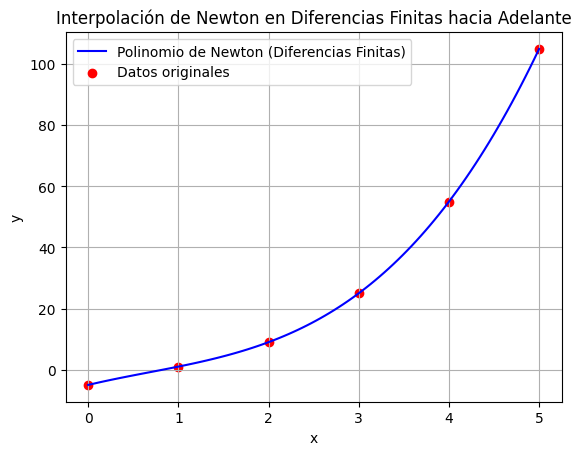

El valor del polinomio en x = 1.5 es aproximadamente y = 4.3750


In [22]:
# Código creado por Joshua Mijangos López, 12/11/24
# Este código está hecho para que el valor en donde se busca evaluar el polinomio se modifique desde aquí

import numpy as np
import matplotlib.pyplot as plt

def diferencias_finitas(y): # Calcula las diferencias finitas hacia adelante.
    n = len(y)
    dif = [y]  # Inicializamos con el primer nivel de diferencias (los valores originales de y)
    for i in range(1, n):
        # Calculamos las diferencias del nivel i
        nivel = [dif[i-1][j+1] - dif[i-1][j] for j in range(n - i)]
        dif.append(nivel)
    return dif

def evalua_newton_adelante(dif, x_data, x, h): # Evalúa el polinomio interpolante de Newton en diferencias finitas hacia adelante.
    # Calculamos k = (x - x0) / h
    k = (x - x_data[0]) / h
    p = dif[0][0]  # Empezamos con y0

    # Sumamos los términos sucesivos del polinomio
    producto = 1  # Inicializamos el producto acumulado
    for i in range(1, len(dif)):
        producto *= (k - (i - 1)) / i # Cálculo Binomial de manera explícita
        p += producto * dif[i][0]  # Agregamos el término i al polinomio
    return p

# Datos de la tabla
x_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([-5, 1, 9, 25, 55, 105])
h = x_data[1] - x_data[0]  # Distancia entre puntos (debe ser constante)

# Calculamos las diferencias finitas hacia adelante
diferencias = diferencias_finitas(y_data)

# Evaluamos el polinomio en una serie de puntos para la gráfica
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_vals = [evalua_newton_adelante(diferencias, x_data, x, h) for x in x_vals]

# Gráfica
plt.plot(x_vals, y_vals, label="Polinomio de Newton (Diferencias Finitas)", color="blue")
plt.scatter(x_data, y_data, color="red", label="Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolación de Newton en Diferencias Finitas hacia Adelante")
plt.grid()
plt.show()

# Ejemplo de evaluación en un punto específico
x_evaluar = 1.5  # Este valor se modifica según el punto que desees evaluar
y_evaluado = evalua_newton_adelante(diferencias, x_data, x_evaluar, h)
print(f"El valor del polinomio en x = {x_evaluar} es aproximadamente y = {y_evaluado:.4f}")